This script allows us to test if the manipulation of green plants works. The greenness of each image was calculated in compute_greenness.py.

In [47]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
# load the experimental data, re-categorize it and drop the duplicates
df_subjects = pd.read_excel("Data_exp1.xlsx")
df_subjects['Category'] = np.where(df_subjects['PredHominess'] == 'Plus', 'Plus', df_subjects['Dimension'])
df_info = df_subjects[["ImageNumber", "Category"]].drop_duplicates()
# load the image information
df_images = pd.read_csv("Image_info.csv")

In [62]:
# quick check
df_images.head()

,ImageNumber,ImageName,Greenness
0,1,1.jpeg,0.000000
1,2,2.jpeg,0.064579
2,3,3.jpeg,0.027116
3,4,4.jpeg,0.034674
4,5,5.jpeg,0.004193


In [63]:
# combine the two data frames
df_greenness = pd.merge(df_images, df_info, on="ImageNumber", how="left")
df_greenness.set_index('ImageNumber', inplace=True)
df_greenness

,ImageName,Greenness,Category
ImageNumber,,,
1,1.jpeg,0.000000,Plus
2,2.jpeg,0.064579,Plus
3,3.jpeg,0.027116,Plus
4,4.jpeg,0.034674,Plus
5,5.jpeg,0.004193,Plus
...,...,...,...
156,156.jpeg,0.000014,Combined
157,157.jpeg,0.000080,Combined
158,158.jpeg,0.000067,Combined


In [65]:
# Statistics
df_greenness.groupby("Category")["Greenness"].describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Biophilic,20.0,0.003288,0.005991,0.0,0.000040,0.000408,0.003036,0.023622
Ceiling,20.0,0.012032,0.028737,0.0,0.000026,0.002986,0.012263,0.128915
Combined,20.0,0.004351,0.017543,0.0,0.000009,0.000044,0.000307,0.078753
Lighting,20.0,0.000735,0.001803,0.0,0.000002,0.000010,0.000216,0.006344
Plus,80.0,0.026315,0.030291,0.0,0.001256,0.011671,0.043997,0.136849


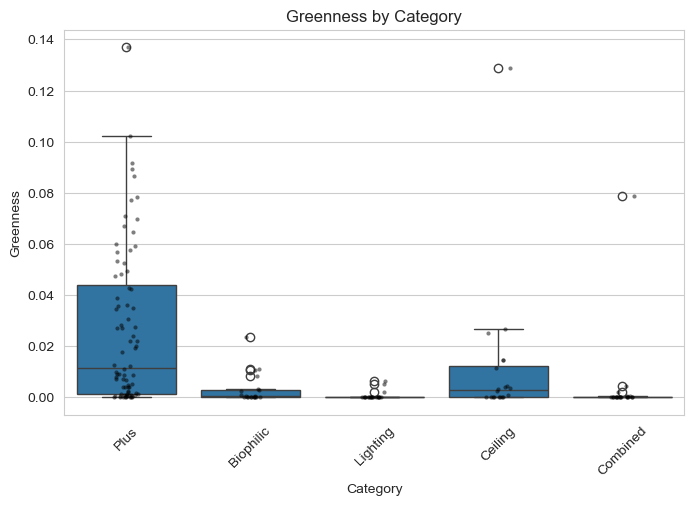

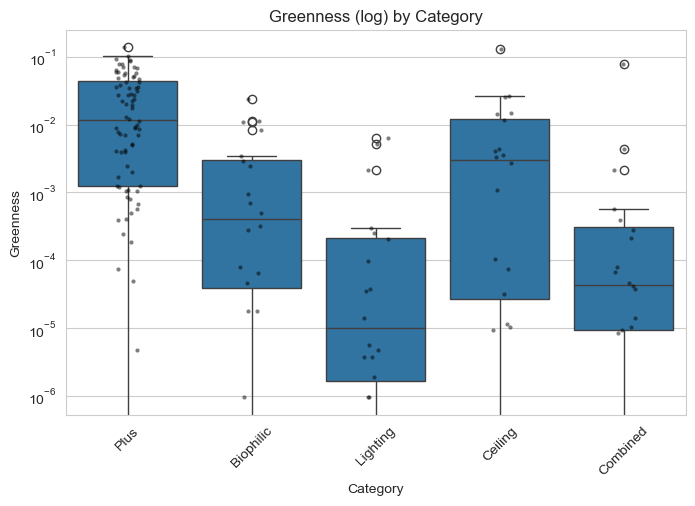

In [68]:
# Plots
# Raw data
plt.figure(figsize=(8,5))
sns.boxplot(x="Category", y="Greenness", data=df_greenness)
sns.stripplot(x="Category", y="Greenness", data=df_greenness, color="black", size=3, alpha=0.5)
plt.title("Greenness by Category")
plt.xticks(rotation=45)
plt.show()

# Log-scale y-axis to make it more clear
plt.figure(figsize=(8,5))
sns.boxplot(x="Category", y="Greenness", data=df_greenness)
sns.stripplot(x="Category", y="Greenness", data=df_greenness, color="black", size=3, alpha=0.5)
plt.title("Greenness (log) by Category")
plt.xticks(rotation=45)
plt.yscale("log")
plt.show()


In [69]:
# Hypothesis testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# one-way ANOVA
model = ols("Greenness ~ C(Category)", data=df_greenness).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("=== One-way ANOVA ===")
print(anova_table)

# Post hoc (Tukey HSD)
print("\n=== Tukey HSD (post-hoc) ===")
tukey = pairwise_tukeyhsd(endog=df_greenness["Greenness"],
                          groups=df_greenness["Category"],
                          alpha=0.05)
print(tukey)


=== One-way ANOVA ===
               sum_sq     df         F    PR(>F)
C(Category)  0.019420    4.0  7.940815  0.000008
Residual     0.094769  155.0       NaN       NaN

=== Tukey HSD (post-hoc) ===
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1   group2  meandiff p-adj   lower  upper  reject
--------------------------------------------------------
Biophilic  Ceiling   0.0087 0.7968 -0.0128 0.0303  False
Biophilic Combined   0.0011 0.9999 -0.0205 0.0226  False
Biophilic Lighting  -0.0026 0.9975 -0.0241  0.019  False
Biophilic     Plus    0.023 0.0025   0.006 0.0401   True
  Ceiling Combined  -0.0077 0.8629 -0.0293 0.0139  False
  Ceiling Lighting  -0.0113 0.5998 -0.0329 0.0103  False
  Ceiling     Plus   0.0143  0.147 -0.0028 0.0313  False
 Combined Lighting  -0.0036 0.9905 -0.0252  0.018  False
 Combined     Plus    0.022 0.0045  0.0049  0.039   True
 Lighting     Plus   0.0256 0.0005  0.0085 0.0426   True
--------------------------------------------------------


Our hypothesis is that greenness is close to biophilic. It's true that the greenness values of biophilic (remove this dimension) and combined (remove all dimensions) images are significantly lower that those of plus images and there's no difference between plus and ceiling images. However, the greenness of lighting images is also lower than that of plus images. This is exactly what we were worried about —— the removal of lighting leads to the decrease of greenness.